In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(273262, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273262 entries, 0 to 273261
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    273262 non-null  float64
 1   V1      273262 non-null  float64
 2   V2      273262 non-null  float64
 3   V3      273262 non-null  float64
 4   V4      273262 non-null  float64
 5   V5      273262 non-null  float64
 6   V6      273262 non-null  float64
 7   V7      273262 non-null  float64
 8   V8      273262 non-null  float64
 9   V9      273262 non-null  float64
 10  V10     273262 non-null  float64
 11  V11     273262 non-null  float64
 12  V12     273262 non-null  float64
 13  V13     273262 non-null  float64
 14  V14     273262 non-null  float64
 15  V15     273261 non-null  float64
 16  V16     273261 non-null  float64
 17  V17     273261 non-null  float64
 18  V18     273261 non-null  float64
 19  V19     273261 non-null  float64
 20  V20     273261 non-null  float64
 21  V21     27

In [56]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000
mean,91689.494416,-0.005661,-0.011566,0.031749,0.006925,-0.012742,0.005653,-0.005842,-0.000684,-0.000193,0.001198,0.013028,-0.010288,0.001192,0.004324,0.007956,-0.000912,0.002608,-0.004630,-0.000814,0.000901,-0.000234,-0.003195,-0.001665,0.000393,0.006193,0.000533,-0.000148,0.000419,89.176571,0.001764
std,45928.226716,1.957568,1.653789,1.510507,1.416367,1.365857,1.324647,1.218181,1.193695,1.102257,1.086008,1.023233,1.009416,1.000119,0.960535,0.919301,0.878725,0.853205,0.840168,0.815327,0.770396,0.737152,0.723127,0.629038,0.605856,0.519090,0.483242,0.398821,0.331547,247.094518,0.041962
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,52930.500000,-0.921514,-0.606329,-0.841474,-0.846800,-0.704854,-0.762333,-0.558301,-0.206831,-0.648007,-0.530990,-0.749165,-0.416265,-0.651047,-0.419015,-0.576658,-0.470994,-0.479163,-0.502084,-0.460665,-0.210674,-0.227212,-0.539137,-0.162686,-0.353296,-0.309694,-0.327807,-0.070674,-0.052197,5.900000,0.000000
50%,81799.500000,0.019750,0.060154,0.218640,-0.007932,-0.069185,-0.266656,0.033290,0.023732,-0.053002,-0.090770,-0.022366,0.133090,-0.013547,0.052840,0.060713,0.065182,-0.062309,-0.008494,0.002292,-0.060880,-0.029935,0.004605,-0.013175,0.042383,0.027731,-0.054306,0.001580,0.012000,22.500000,0.000000
75%,135516.000000,1.300409,0.791299,1.051607,0.759570,0.596475,0.405850,0.561713,0.326826,0.600892,0.458054,0.755651,0.615033,0.664822,0.494988,0.661996,0.525268,0.401437,0.496437,0.461350,0.135069,0.183407,0.519566,0.144295,0.437124,0.354752,0.243041,0.089967,0.077859,78.480000,0.000000
max,165515.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [57]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    272779
Fraud           482
Name: Class, dtype: int64


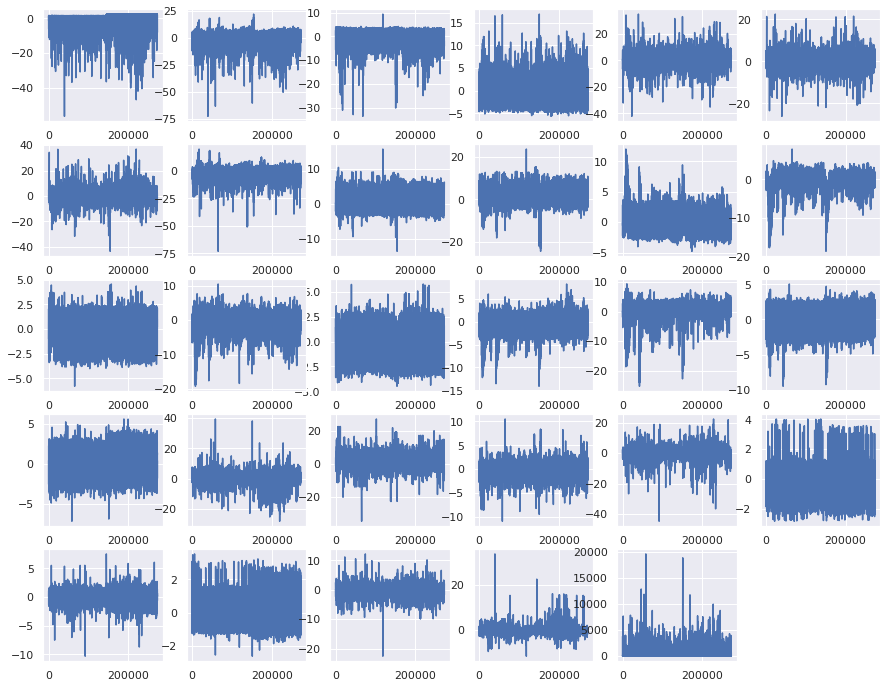

In [58]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [61]:
data_features = df[feature_names]
data_target = df[target]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 191283
Length of X_test is: 81979
Length of y_train is: 191283
Length of y_test is: 81979


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [64]:
model = LogisticRegression()
model.fit

<bound method LogisticRegression.fit of LogisticRegression()>

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit

<bound method LogisticRegression.fit of LogisticRegression()>

In [66]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit

<bound method LogisticRegression.fit of LogisticRegression(random_state=0)>

In [68]:
print(X_train)

              V1        V2        V3  ...       V27       V28   Amount
155984 -0.540028  0.867155  1.911255  ... -0.210201 -0.156693    11.27
18117   1.297117  0.295385 -0.152326  ... -0.026364  0.009137     0.99
197271 -0.603693 -0.359760 -0.051017  ...  0.033875 -0.307650   305.77
68171   1.418468 -1.301239  0.736703  ...  0.054101  0.023655    30.80
16041   1.535424 -1.136798 -0.146356  ...  0.035521 -0.009038    10.00
...          ...       ...       ...  ...       ...       ...      ...
21440  -2.986845 -8.663978 -1.910863  ... -0.382702  0.404045  2312.26
117583  0.937083 -0.849673  0.524186  ... -0.060168  0.023771   171.32
73349  -1.149963  1.696462  1.637114  ... -0.162047  0.031193     7.58
267336  1.754554 -0.699398 -0.076332  ... -0.005853 -0.019622    94.80
128037 -0.707635  0.493302  2.648089  ... -0.385589 -0.205589    57.80

[191283 rows x 29 columns]


In [69]:
print(y_train)

        Class
155984    0.0
18117     0.0
197271    0.0
68171     0.0
16041     0.0
...       ...
21440     0.0
117583    0.0
73349     0.0
267336    0.0
128037    0.0

[191283 rows x 1 columns]


In [70]:
print(X_test)

              V1        V2        V3  ...       V27       V28  Amount
84437  -2.177002 -1.271227  1.566449  ...  0.162949 -0.177306    1.00
92182   1.110350 -0.055416  1.325949  ...  0.060760  0.029154    6.53
39077   1.408030 -1.316365 -0.190234  ... -0.008854  0.006303   85.68
161499 -0.610812  1.014630  0.183419  ...  0.012511  0.054587   53.50
186109  1.183003 -2.111280 -1.077631  ... -0.126583  0.007375  440.00
...          ...       ...       ...  ...       ...       ...     ...
48549   1.214811 -0.115284  0.853358  ... -0.063968  0.001310    1.00
20698  -1.276149  1.542366  1.174441  ...  0.514445  0.156046    8.99
74504   1.318921 -0.502773  0.319480  ... -0.065241  0.018496   47.95
212603 -2.485346 -2.639946  0.847976  ... -0.193912  0.171521  463.00
12625   1.162061 -0.388315  1.126597  ...  0.074737  0.028351   11.85

[81979 rows x 29 columns]


In [71]:
pred = model.predict

In [72]:
print(y_test)

        Class
84437     0.0
92182     0.0
39077     0.0
161499    0.0
186109    0.0
...       ...
48549     0.0
20698     0.0
74504     0.0
212603    0.0
12625     0.0

[81979 rows x 1 columns]


In [73]:
print(pred)

<bound method LinearClassifierMixin.predict of LogisticRegression(random_state=0, solver='liblinear')>


In [74]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [75]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix
print(cm)

<function confusion_matrix at 0x7f9113d0e710>
